import networkx as nx #include networkx and change the name to nx
import matplotlib.pyplot as plt #include the print graph 
nx.generators.random_graphs.newman_watts_strogatz_graph(200, 5, 0.2) #生成一small-world G
(200 - node) (5-與其附近最近的幾個node連接(必須為偶數，若奇數則-1))

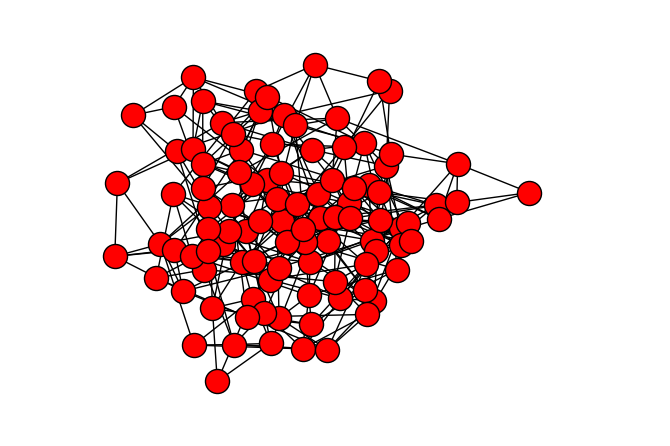

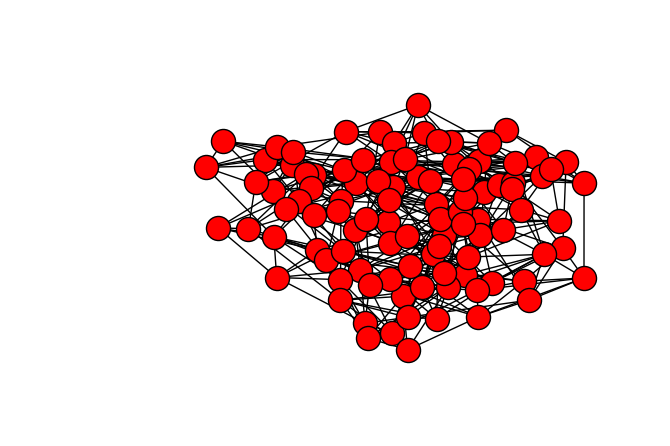

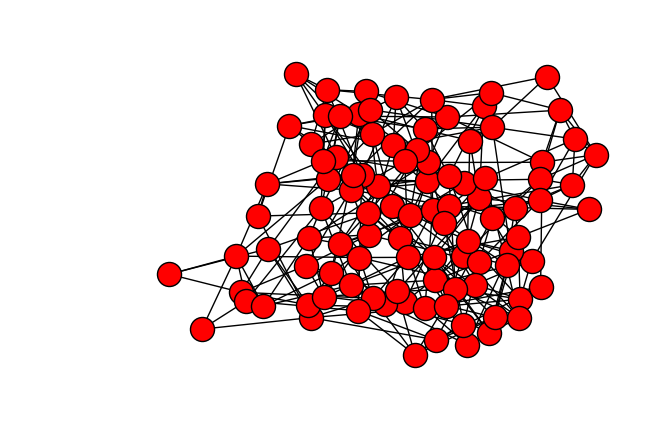

In [8]:
import networkx as nx             #import networkx
import matplotlib.pyplot as plt 
import community
G = nx.generators.random_graphs.connected_watts_strogatz_graph(100, 6, 0.5,20,100 ) #生成一small-world undirected  G
nx.draw(G)                               #畫網絡G
#plt.savefig("ba.png")           #输出方式1: to png
plt.show()                      #输出方式2: show on the program
G = nx.generators.random_graphs.newman_watts_strogatz_graph(100, 6, 0.5 ) #生成一small-world undirected  G #add-edge
nx.draw(G)                               #畫網絡G
#plt.savefig("ba.png")           #输出方式1: to png
plt.show()                      #输出方式2: show on the program
G = nx.generators.random_graphs.watts_strogatz_graph(100, 6, 0.5,20 ) #生成一small-world undirected  G #replace-edge
nx.draw(G)                               #畫網絡G
#plt.savefig("ba.png")           #输出方式1: to png
plt.show()                      #输出方式2: show on the program


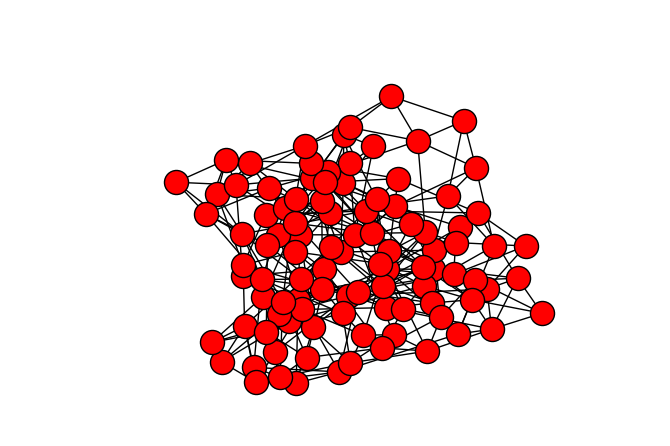

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
average_clustering
0.26325396825396813
global_efficiency
0.3784747474747683
local_efficiency
0.7388603896103896
cluster_transitivity
0.22178217821782178


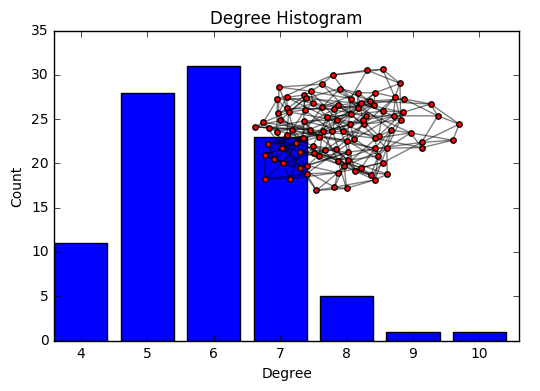

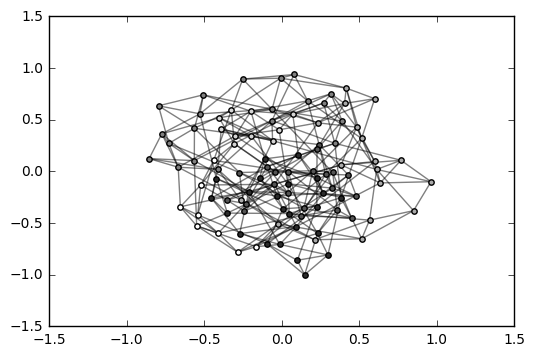

In [1]:
import networkx as nx             #import networkx
import matplotlib.pyplot as plt 
import community
G = nx.generators.random_graphs.newman_watts_strogatz_graph(100, 4, 0.5 ) #生成一small-world undirected  G
nx.draw(G)                               #畫網絡G
plt.savefig("ba.png")           #输出方式1: to png
plt.show()                      #输出方式2: show on the program
print (G.nodes())               #print_node 
partition = community.best_partition(G) #first-compute best partition
H=nx.classes.function.degree(G) #degree-node 哪些邊有連結哪些點
#print(H)
k=nx.degree_assortativity_coefficient(G) #assortativity
#print(k)
u=nx.algorithms.centrality.closeness_centrality(G) #every-node-near-whole-graph-center
#print(u)
q=nx.algorithms.centrality.betweenness_centrality(G) #every-node-near-whole-graph-center
#print(q)
#e=nx.algorithms.cluster.clustering(G) #every-node-cc-coeffcient
#print(e)
e=nx.average_clustering(G)
print("average_clustering")
print(e)
ge=nx.algorithms.global_efficiency(G) #global-efficiency
print("global_efficiency")
print(ge)
le=nx.algorithms.local_efficiency(G) #local-efficiency
print("local_efficiency")
print(le)
ts=nx.algorithms.cluster.transitivity(G)
print("cluster_transitivity")
print(ts)
nbd=nx.average_neighbor_degree(G)
#print("average_neighbor_degree")
#print(nbd)
##
#degree-dis
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=15)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.savefig("degree.png")
plt.show()
#z-score & participation call other funciton
#call motif

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G) #指定節點排列方式 用Fruchterman-Reingold算法排列　多中心狀
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 15, #30-node
                                node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.savefig("modular.png")
plt.show()

In [ ]:
##parallel_betweenness-show
##low_compute
from multiprocessing import Pool
import time
import itertools
def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x


def _betmap(G_normalized_weight_sources_tuple):
    """Pool for multiprocess only accepts functions with one argument.
    This function uses a tuple as its only argument. We use a named tuple for
    python 3 compatibility, and then unpack it when we send it to
    `betweenness_centrality_source`
    """
    return nx.betweenness_centrality_source(*G_normalized_weight_sources_tuple)


def betweenness_centrality_parallel(G, processes=None):
    """Parallel betweenness centrality  function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool) * 4
    node_chunks = list(chunks(G.nodes(), int(G.order() / node_divisor)))
    num_chunks = len(node_chunks)
    bt_sc = p.map(_betmap,
                  zip([G] * num_chunks,
                      [True] * num_chunks,
                      [None] * num_chunks,
                      node_chunks))

    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c


if __name__ == "__main__":
    G_ba = nx.barabasi_albert_graph(100, 3)
    G_er = nx.gnp_random_graph(100, 0.01)
    G_ws = nx.connected_watts_strogatz_graph(100, 4, 0.1)
    for G in [G_ba, G_er, G_ws]:
        print("")
        print("Computing betweenness centrality for:")
        print(nx.info(G))
        print("\tParallel version")
        start = time.time()
        bt = betweenness_centrality_parallel(G)
        print("\t\tTime: %.4F" % (time.time() - start))
        print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))
        print("\tNon-Parallel version")
        start = time.time()
        bt = nx.betweenness_centrality(G)
        print("\t\tTime: %.4F seconds" % (time.time() - start))
        print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))
    print("")

    nx.draw(G_ws)
    plt.show()


Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 291
Average degree:   5.8200
	Parallel version
